Denis Aleksandrov, 5 January 2020

## Task

2. Marketing campaigns

Have a look at the data included in the marketing campaigns dataset and import it into a tool of your choice for analysis and visualization. The data contains weekly information about different online marketing campaigns in one market.

a) Give an overview of entire market’s development and the different campaigns. Please prepare 3-5 charts and summarize the most important findings.

b) How would you assess the development of the quality of traffic, e.g. in terms of revenue per visitor. How is the overall development and how does each campaign evolve?

c) You are talking with the responsible business developer for the market who wants to spend an additional 250€ per week from week 31 onwards. Please help him out with the following questions:

• What is your advice in which campaign to invest and why?

• How do you expect this to impact the overall performance in the market from week 31
onwards?

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('seaborn-whitegrid')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

from pptx import Presentation
from pptx.util import Cm
from io import BytesIO

In [2]:
# initiate Presentation
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]

slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
title.text = "Marketing Campaigns Analysis"
subtitle = slide.placeholders[1]
subtitle.text = "by Denis Aleksandrov"

In [3]:
# save plot to pptx slide
def add_plot_on_slide(plt):
    # create buffer for image
    plot_image = BytesIO()
    plt.savefig(plot_image)

    # save plot to pptx
    slide = prs.slides.add_slide(title_slide_layout)
    title = slide.shapes.title
    subtitle = slide.placeholders[1]
    left = Cm(0)
    top = Cm(3)
    width = Cm(25)
    pic = slide.shapes.add_picture(plot_image, left, top, width)

## Definitions

The following definitions are used in this analysis:
- *WoW*: Week-over-Week change
- *RPV*: Revenue Per Visitor
- *W1..W30*: Week 1 .. Week 30

------

## Input data

- Weekly information about different online marketing campaigns in one market

------

## Data issues found
- 1 duplicated row for campaign "Cottington", Week 30. Will be dropped for analysis.

------

## Results

### Entire market overview

- Entire market has been growing last 30 weeks from Visits (average +4.2% weekly) and Revenue (avg. +3.2%) perspective, but not Profit (avg. -84.8%).
- Revenue is highly correlated with marketing spends (Cost)
- Visits are also correlated with Costs, but there were some exceptions: weeks 15, 20 had decreased Costs, but number of Visitors still increased. Might be useful to dig deeper these weeks and investigate the reasons
- Profit was positive on first weeks (1-7), but from Week 8 it is negative or close to 0 (a few weeks: 8, 10, 12, 15, 16)
- ROMI has been decreasing and all weeks from 16 is below 0


### Campaigns overview

Looking on different campaigns we can outline the following key findings:

"Aldebaran":
- The most "aggressive" WoW growth (e.g. Profit average increase +374.9% weekly)
- Profit has been increasing from Week 14 until now, and is positive from Week 21
- ROMI has always been increasing (+362.8% weekly). Was lower than each of other campaigns in the beginning, but the highest from Week 21

"Bartledan":
- Is unprofitable campaign, all weeks Revenue doesn't cover the Costs
- The more Costs are spent, the more loss was generated

"Cottington":
- The highest average weekly Profit: 12.2€
- But Profit has negative trend and values are below 0 from Week 21

### Traffic Quality development overview

- Overall RPV decreased -25.4%: from 1.39€ (W1) to 1.04€ (W30) with average growth -0.9% weekly
- "Aldebaran" RPV increased +399.9%: from 0.08€ (W1) to 0.42€ (W30) with average growth +10.5% weekly
- "Bartledan" RPV increased +62.8%: from 1.02€ (W1) to 1.65€ (W30) with average growth +1.8% weekly
- "Cottington" RPV increased +46.3%: from 1.95€ (W1) to 2.86€ (W30) with average growth +1.4% weekly

"Cottington" has the highest average RPV (2.47€) and still the highest on W30 (2.86€), but need to keep in mind: if campaigns will keep the same trend, "Aldebaran" will overtake it after some weeks.

### Additional marketing spends

#### Campaign choice

I would advice to invest additional 250€ in "Aldebaran" campaign due to the following reasons:
- Its ROMI is the highest from W21 and actually the only one which is above 0: 21% on W30 vs. -8% both of  "Bartledan" and "Cottington"
- Its ROMI trend is also positive and much higher than others: +362.8% weekly average
- It is the only one campaign which Profit is also increasing with increased Costs. "Bartledan" had never been profitable and shows decreasing ROMI trend even with additional Costs. "Cottington" was showing better ROMI with Costs around 350€, and became unprofitable after we started to invest more in it from W21.

#### Impact on overall performance

- If we invest additional 250€ in "Aldebaran" campaign each week from Week 31 and freeze the Costs for other campaigns on Week 30 values, overall market will become profitable from Week 34 (with Profit 14.5€)
- Average weekly growth of Profit from Week 31 to Week 45 will be 65.4%

Other possible improvements:
- Adjust other campaigns
- Include LTV information for campaigns evaluation

------

## Get data & overview

In [4]:
df_campaigns = pd.read_csv('marketing_campaigns.csv', delimiter=';')

In [5]:
# Look on shape
df_campaigns.shape

(91, 5)

In [6]:
# Look on data
df_campaigns.head()

,Week,Campaign,Visits,Revenue,Cost
0,1,Aldebaran,27,2.269511,3.763627
1,2,Aldebaran,64,10.820403,15.322613
2,3,Aldebaran,80,7.132998,10.753533
3,4,Aldebaran,93,11.085813,16.906191
4,5,Aldebaran,120,14.282481,21.446570


In [7]:
# Check for Null values
df_campaigns.isnull().sum()

Week        0
Campaign    0
Visits      0
Revenue     0
Cost        0
dtype: int64

In [8]:
# Check for duplicates
df_campaigns.duplicated().sum()

1

In [9]:
df_campaigns[df_campaigns.duplicated() == True]

,Week,Campaign,Visits,Revenue,Cost
90,30,Cottington,125,357.412673,389.868883


In [10]:
df_campaigns[df_campaigns.Week == 30]

,Week,Campaign,Visits,Revenue,Cost
29,30,Aldebaran,613,257.580258,213.422839
59,30,Bartledan,247,408.339972,441.629893
89,30,Cottington,125,357.412673,389.868883
90,30,Cottington,125,357.412673,389.868883


We have 1 duplicated row for Week = 30, Campaing = Cottington. Will drop it on next steps.

In [11]:
# Look on datatypes
df_campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 5 columns):
Week        91 non-null int64
Campaign    91 non-null object
Visits      91 non-null int64
Revenue     91 non-null float64
Cost        91 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 3.7+ KB


In [12]:
# Look on Campaigns
df_campaigns.Campaign.unique()

array(['Aldebaran', 'Bartledan', 'Cottington'], dtype=object)

## Prepare data

In [13]:
# Remove duplicates
df_campaigns.drop_duplicates(inplace=True)
df_campaigns.shape

(90, 5)

## Analysis

### Overview of market’s development 

#### Entire market

In [14]:
# Calculate Profit
df_campaigns['Profit'] = df_campaigns.Revenue - df_campaigns.Cost

# Group data by Week
df_campaigns_agg = df_campaigns.drop(columns='Campaign').groupby('Week').sum().reset_index()

# Calculate ROMI
df_campaigns['ROMI'] = (df_campaigns.Revenue - df_campaigns.Cost) / df_campaigns.Cost
df_campaigns['ROMI'] = round(df_campaigns['ROMI'], 4)

df_campaigns_agg['ROMI'] = (df_campaigns_agg.Revenue - df_campaigns_agg.Cost) / df_campaigns_agg.Cost
df_campaigns_agg['ROMI'] = round(df_campaigns_agg['ROMI'], 4)

In [15]:
df_campaigns_agg.describe()

,Week,Visits,Revenue,Cost,Profit,ROMI
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,15.500000,644.366667,706.205246,719.665424,-13.460178,-0.007313
std,8.803408,221.290336,207.579367,233.683977,29.123673,0.044126
min,1.000000,304.000000,421.962894,378.274486,-77.094185,-0.068000
25%,8.250000,459.500000,523.826644,520.518973,-27.735988,-0.034300
50%,15.500000,634.000000,679.448380,693.567923,-12.901195,-0.020350
75%,22.750000,847.000000,882.812053,910.346257,8.216296,0.015050
max,30.000000,990.000000,1055.912403,1133.006588,45.166718,0.119400


In [16]:
# Plot mrkt development
def plot_mrkt_dev(df, title, MAE_visits=None, MAE_revenue=None):
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1,1,1)

    ax.set_title(title, fontsize=20)
    ax.plot(df.Week, df.Visits, label='Visits', color='lightblue')
    ax.plot(df.Week, df.Revenue, label='Revenue', color='black')
    ax.plot(df.Week, df.Cost, label='Cost', color='red')
    ax.plot(df.Week, df.Profit, label='Profit', color='green')
    ax.set_xticks(df.Week.unique())
    ax.set_xlabel('Week', fontsize=13)
    
    # for DF with Forecasted weeks plot filled area
    if df.Week.nunique() > 30:
        ax.axvspan(30, df.Week.max(), alpha=0.5, color='#daedf2', label='Forecast')
        # add annotation
        MAE_visits_text = '* Mean Absolute Error (MAE) of Visits Forecast: {}'.format(MAE_visits)
        MAE_revenue_text = '  Mean Absolute Error (MAE) of Revenue Forecast: {}€'.format(MAE_revenue)
        plt.figtext(0.1, 0.01
                    , MAE_visits_text + '\n' + MAE_revenue_text
                    , fontsize=12, horizontalalignment = 'left') 
        
    ax.legend(loc='upper left', fontsize=12, frameon=True)
    
    add_plot_on_slide(plt)

    plt.show()

In [17]:
# Plot ROMI
def plot_romi():
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1,1,1)

    ax.set_title('ROMI', fontsize=20)

    # Overall ROMI
    ax.plot(df_campaigns_agg.Week, df_campaigns_agg.ROMI, label='Overall', color='black')

    # ROMI for each campaign
    for campaign in df_campaigns.Campaign.unique():
        ax.plot(df_campaigns[df_campaigns.Campaign == campaign].Week
                ,df_campaigns[df_campaigns.Campaign == campaign].ROMI, label=campaign)

    ax.set_xticks(df_campaigns_agg.Week.values)
    ax.set_xlabel('Week', fontsize=13)
    ax.set_ylabel('ROMI (%)', fontsize=13)
    ax.yaxis.set_major_formatter(PercentFormatter(1))

    ax.legend(loc='lower right', fontsize=12, frameon=True)
    
    add_plot_on_slide(plt)

    plt.show()

In [18]:
# Calculate Means
def calc_mean(df):
    df_mean = pd.DataFrame(df.drop(columns='Week').mean()).rename(columns={0: 'Mean abs.'})
    wow_growth = abs(df.pct_change()) \
                 * np.sign(df.diff())
    df_mean['Mean WoW Growth (%)'] = wow_growth.mean()
    
    return df_mean
    
def show_mean(df):
    return display(calc_mean(df).style.format({'Mean WoW Growth (%)': '{:,.1%}'.format}))

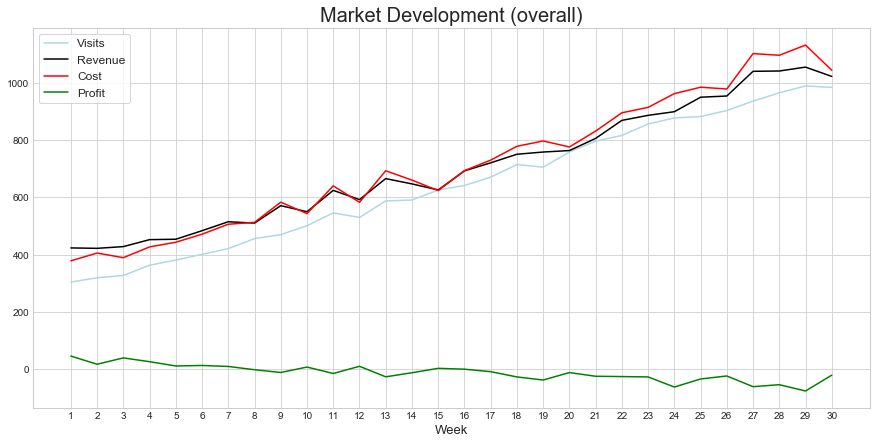

,Mean abs.,Mean WoW Growth (%)
Visits,644.367,4.2%
Revenue,706.205,3.2%
Cost,719.665,3.8%
Profit,-13.4602,-84.8%
ROMI,-0.00731333,-76.2%


In [19]:
plot_mrkt_dev(df_campaigns_agg, 'Market Development (overall)')
show_mean(df_campaigns_agg)

### Entire market overview

- Entire market has been growing last 30 weeks from Visits (average +4.2% weekly) and Revenue (avg. +3.2%) perspective, but not Profit (avg. -84.8%).
- Revenue is highly correlated with marketing spends (Cost)
- Visits are also correlated with Costs, but there were some exceptions: weeks 15, 20 had decreased Costs, but number of Visitors still increased. Might be useful to dig deeper these weeks and investigate the reasons
- Profit was positive on first weeks (1-7), but from Week 8 it is negative or close to 0 (a few weeks: 8, 10, 12, 15, 16)
- ROMI has been decreasing and all weeks from 16 is below 0

------

#### Different campaigns

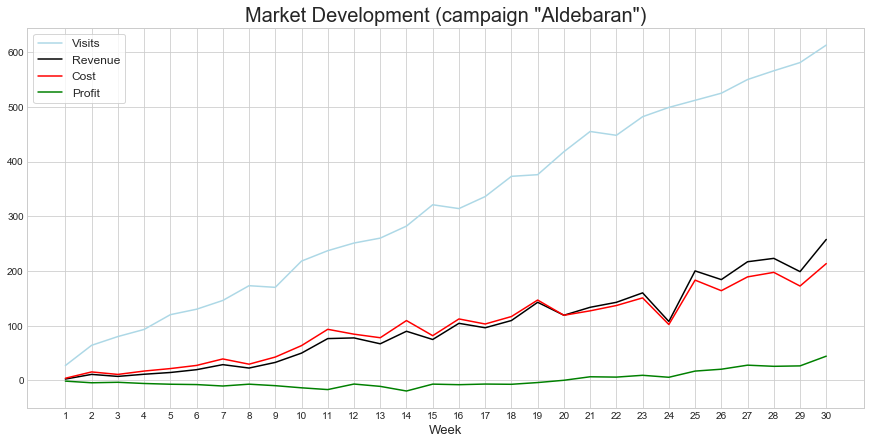

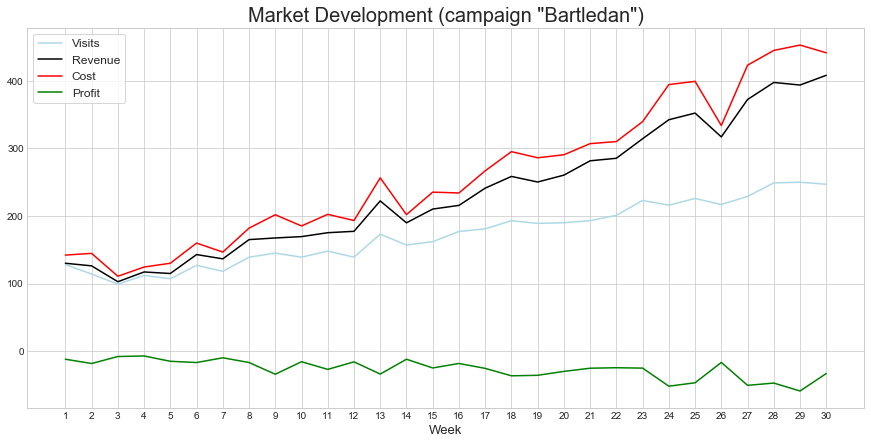

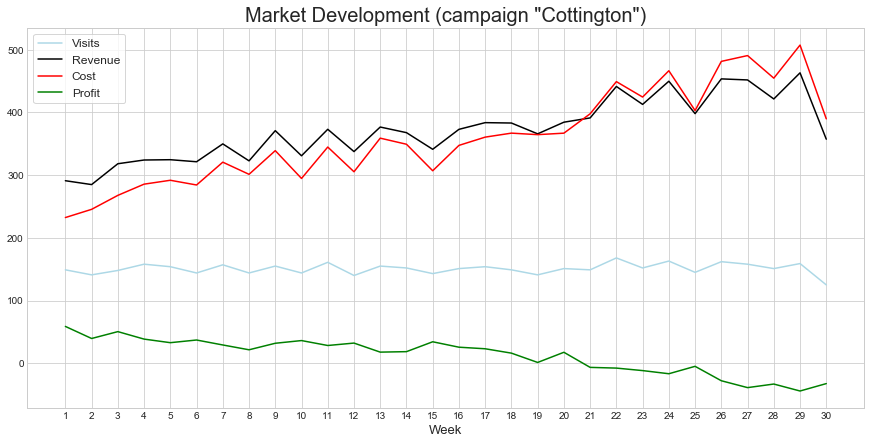

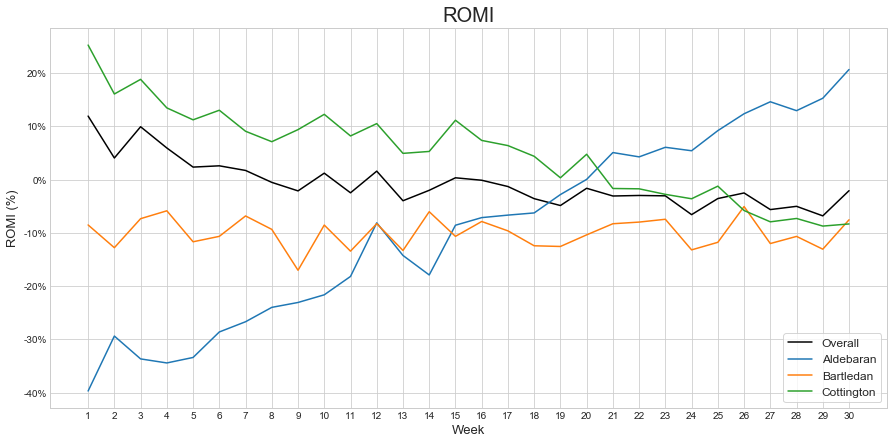

Campaign: Aldebaran


,Mean abs.,Mean WoW Growth (%)
Visits,320.667,13.1%
Revenue,99.2827,28.3%
Cost,98.3196,23.7%
Profit,0.963051,374.9%
ROMI,-0.09277,362.8%




Campaign: Bartledan


,Mean abs.,Mean WoW Growth (%)
Visits,172.933,2.7%
Revenue,234.652,4.5%
Cost,261.276,4.8%
Profit,-26.6235,-20.7%
ROMI,-0.0999833,-10.6%




Campaign: Cottington


,Mean abs.,Mean WoW Growth (%)
Visits,150.767,-0.2%
Revenue,372.27,1.1%
Cost,360.07,2.4%
Profit,12.2003,15.4%
ROMI,0.0500933,18.4%




* There are no significant outliers, therefore not Median, but Mean was used.


In [20]:
for campaign in df_campaigns.Campaign.unique():
    plot_mrkt_dev(df_campaigns[df_campaigns.Campaign == campaign]
                  , """Market Development (campaign "{}")""".format(campaign))
    
plot_romi()

for campaign in df_campaigns.Campaign.unique():
    print("Campaign: " + campaign)
    show_mean(df_campaigns[df_campaigns.Campaign == campaign].drop(columns='Campaign'))
    print('\n')
    
print('* There are no significant outliers, therefore not Median, but Mean was used.')

### Campaigns overview

Looking on different campaigns we can outline the following key findings:

"Aldebaran":
- The most "aggressive" WoW growth (e.g. Profit average increase +374.9% weekly)
- Profit has been increasing from Week 14 until now, and is positive from Week 21
- ROMI has always been increasing (+362.8% weekly). Was lower than each of other campaigns in the beginning, but the highest from Week 21

"Bartledan":
- Is unprofitable campaign, all weeks Revenue doesn't cover the Costs
- The more Costs are spent, the more loss was generated

"Cottington":
- The highest average weekly Profit: 12.2€
- But Profit has negative trend and values are below 0 from Week 21

### Traffic quality

In [21]:
# Calculate metrics
df_campaigns_agg['RPV'] = df_campaigns_agg.Revenue / df_campaigns_agg.Visits

df_campaigns['RPV'] = df_campaigns.Revenue / df_campaigns.Visits

df_campaigns_agg.head(1).style.format({'ROMI': "{:.2%}"})

,Week,Visits,Revenue,Cost,Profit,ROMI,RPV
0,1,304,423.441,378.274,45.1667,11.94%,1.3929


In [22]:
# Plot RPV
def plot_RPV():
    # Create figure and subplots
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,1,1)

    ax.set_title('Traffic Quality: RPV', fontsize=20)

    # RPV Overall
    ax.plot(df_campaigns_agg.Week, df_campaigns_agg.RPV, label='Overall', color='black')

    # RPV for each campaign
    for campaign in df_campaigns.Campaign.unique():
        ax.plot(df_campaigns[df_campaigns.Campaign == campaign].Week
                ,df_campaigns[df_campaigns.Campaign == campaign].RPV, label=campaign)

    ax.set_xticks(df_campaigns_agg.Week.values)
    ax.set_xlabel('Week', fontsize=13)
    ax.set_ylabel('Euro', fontsize=13)

    ax.legend(loc='upper right', fontsize=12, frameon=True)
    
    add_plot_on_slide(plt)

    plt.show()

In [23]:
# Calculate metric development
def calc_metric_dev(df, metric, group):
    df_metric_dev = pd.DataFrame(df[metric].agg(['min', 'max']))
    df_metric_dev.columns = [group]
    df_metric_dev = df_metric_dev.transpose()

    df_metric_dev['Mean abs.'] = calc_mean(df).loc[metric]['Mean abs.']
    df_metric_dev['Week1'] = df[df.Week == 1][metric].values[0]
    df_metric_dev['Week30'] = df[df.Week == 30][metric].values[0]
    df_metric_dev['W1 to W30 Growth (%)'] = abs(df_metric_dev[['Week1','Week30']].pct_change(axis=1).Week30) \
                                            * np.sign(df_metric_dev[['Week1','Week30']].diff(axis=1).Week30)
    df_metric_dev['Mean WoW Growth (%)'] = calc_mean(df).loc[metric]['Mean WoW Growth (%)']

    for col in df_metric_dev.columns.drop(['W1 to W30 Growth (%)', 'Mean WoW Growth (%)']):
        df_metric_dev[col] = round(df_metric_dev[col], 2)
    
    return df_metric_dev

In [24]:
# Show combined metrics Overall with Campaigns
def show_metrics_dev(metric):
    df_metric = calc_metric_dev(df_campaigns_agg, metric, 'Overall')

    for campaign in df_campaigns.Campaign.unique():
        df_metric_campaign = calc_metric_dev(df_campaigns[df_campaigns.Campaign == campaign].drop(columns='Campaign')
                                             ,metric
                                             ,campaign)
        df_metric = pd.concat([df_metric, df_metric_campaign])

    print(metric)
    if metric == 'ROMI':
        display(df_metric.style.format("{:,.1%}"))
    else:
        display(df_metric.style.format({'W1 to W30 Growth (%)': '{:,.1%}'.format
                                        ,'Mean WoW Growth (%)': '{:,.1%}'.format}))

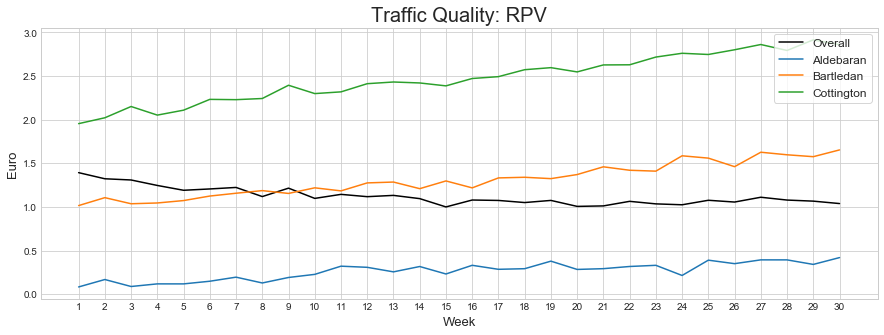

RPV


,min,max,Mean abs.,Week1,Week30,W1 to W30 Growth (%),Mean WoW Growth (%)
Overall,1,1.39,1.12,1.39,1.04,-25.4%,-0.9%
Aldebaran,0.08,0.42,0.26,0.08,0.42,399.9%,10.5%
Bartledan,1.02,1.65,1.31,1.02,1.65,62.8%,1.8%
Cottington,1.95,2.91,2.47,1.95,2.86,46.3%,1.4%


In [25]:
plot_RPV()
show_metrics_dev('RPV')

### Traffic Quality development overview

- Overall RPV decreased -25.4%: from 1.39€ (W1) to 1.04€ (W30) with average growth -0.9% weekly
- "Aldebaran" RPV increased +399.9%: from 0.08€ (W1) to 0.42€ (W30) with average growth +10.5% weekly
- "Bartledan" RPV increased +62.8%: from 1.02€ (W1) to 1.65€ (W30) with average growth +1.8% weekly
- "Cottington" RPV increased +46.3%: from 1.95€ (W1) to 2.86€ (W30) with average growth +1.4% weekly

"Cottington" has the highest average RPV (2.47€) and still the highest on W30 (2.86€), but need to keep in mind: if campaigns will keep the same trend, "Aldebaran" will overtake it after some weeks.

### Additional marketing spends

In [26]:
show_metrics_dev('ROMI')

ROMI


,min,max,Mean abs.,Week1,Week30,W1 to W30 Growth (%),Mean WoW Growth (%)
Overall,-7.0%,12.0%,-1.0%,12.0%,-2.0%,-117.3%,-76.2%
Aldebaran,-40.0%,21.0%,-9.0%,-40.0%,21.0%,152.1%,362.8%
Bartledan,-17.0%,-5.0%,-10.0%,-9.0%,-8.0%,11.4%,-10.6%
Cottington,-9.0%,25.0%,5.0%,25.0%,-8.0%,-132.9%,18.4%


I would advice to invest additional 250€ in "Aldebaran" campaign due to the following reasons:
- Its ROMI is the highest from W21 and actually the only one which is above 0: 21% on W30 vs. -8% both of  "Bartledan" and "Cottington"
- Its ROMI trend is also positive and much higher than others: +362.8% weekly average
- It is the only one campaign which Profit is also increasing with increased Costs. "Bartledan" had never been profitable and shows decreasing ROMI trend even with additional Costs. "Cottington" was showing better ROMI with Costs around 350€, and became unprofitable after we started to invest more in it from W21.

#### Overall market impact

In [27]:
# Prepare DataFrame with Future weeks (from 31)

# Copy last data (from week 30)
columns = ['Week', 'Visits', 'Campaign', 'Revenue', 'Cost']
df_future_weeks = df_campaigns[df_campaigns.Week == 30][columns].copy()

# Rename weeks to 31
df_future_weeks.Week = 31

# Add additional Cost to Aldebaran:
aldebaran_last_cost = df_future_weeks[df_future_weeks.Campaign == 'Aldebaran'].Cost.values[0]
aldebaran_last_cost += 250
df_future_weeks.loc[df_future_weeks.Campaign == 'Aldebaran', 'Cost'] = aldebaran_last_cost

# Add more weeks for forecast
for week_num in range(32, 46):
    aldebaran_last_cost += 250
    for campaign in df_future_weeks.Campaign.unique():
        row = {'Week': week_num
              ,'Campaign': campaign
             }
        if campaign == 'Aldebaran':
            row['Cost'] = aldebaran_last_cost
        df_future_weeks = df_future_weeks.append([row])

# fill N/A with last values of each Campaign
for campaign in df_future_weeks.Campaign.values:
    mask = df_future_weeks.Campaign == campaign
    df_future_weeks.loc[mask] = df_future_weeks.loc[mask].fillna(method='ffill')
    

# Add Week 30
df_future_weeks = pd.concat([df_campaigns[df_campaigns.Week == 30][columns].copy()
                             ,df_future_weeks
                            ])

df_future_weeks.reset_index(inplace=True, drop=True)

df_future_weeks.head(10)

,Week,Visits,Campaign,Revenue,Cost
0,30,613.0,Aldebaran,257.580258,213.422839
1,30,247.0,Bartledan,408.339972,441.629893
2,30,125.0,Cottington,357.412673,389.868883
3,31,613.0,Aldebaran,257.580258,463.422839
4,31,247.0,Bartledan,408.339972,441.629893
5,31,125.0,Cottington,357.412673,389.868883
6,32,613.0,Aldebaran,257.580258,713.422839
7,32,247.0,Bartledan,408.339972,441.629893
8,32,125.0,Cottington,357.412673,389.868883
9,33,613.0,Aldebaran,257.580258,963.422839


In [28]:
# Build model to predict Aldebaran Revenue depending on Cost

x = df_campaigns[df_campaigns.Campaign == 'Aldebaran'].Cost.values.reshape(-1, 1)
y = df_campaigns[df_campaigns.Campaign == 'Aldebaran'].Revenue.values

# Split 30 weeks into 25 for Train and 5 for Test
x_train = x[:25]
y_train = y[:25]

x_test = x[25:]
y_test = y[25:]

model_rev = LinearRegression()
model_rev.fit(x_train, y_train)

y_pred = model_rev.predict(x_test)
# print('predicted:', y_pred, sep='\n')

# Mean absolute error
MAE_revenue = round(mean_absolute_error(y_test, y_pred), 2)
print('Mean absolute error:', MAE_revenue)

Mean absolute error: 25.43


In [29]:
# Build model to predict Aldebaran Visits depending on Cost

x = df_campaigns[df_campaigns.Campaign == 'Aldebaran'].Cost.values.reshape(-1, 1)
y = df_campaigns[df_campaigns.Campaign == 'Aldebaran'].Visits.values

# Split 30 weeks into 25 for Train and 5 for Test
x_train = x[:25]
y_train = y[:25]

x_test = x[25:]
y_test = y[25:]

model_visits = LinearRegression()
model_visits.fit(x_train, y_train)

y_pred = model_visits.predict(x_test)
# print('predicted:', y_pred, sep='\n')

# Mean absolute error
MAE_visits = round(mean_absolute_error(y_test, y_pred), 2)
print('Mean absolute error:', MAE_visits)

Mean absolute error: 29.63


In [30]:
df_future_weeks.head()

,Week,Visits,Campaign,Revenue,Cost
0,30,613.0,Aldebaran,257.580258,213.422839
1,30,247.0,Bartledan,408.339972,441.629893
2,30,125.0,Cottington,357.412673,389.868883
3,31,613.0,Aldebaran,257.580258,463.422839
4,31,247.0,Bartledan,408.339972,441.629893


In [31]:
# Predict Revenue
predicted_revenue = model_rev.predict(df_future_weeks[df_future_weeks.Campaign == 'Aldebaran']['Cost'].values.reshape(-1, 1))
df_future_weeks.loc[df_future_weeks.Campaign == 'Aldebaran', 'Revenue'] = predicted_revenue

# Predict Visits
predicted_visits = model_visits.predict(df_future_weeks[df_future_weeks.Campaign == 'Aldebaran']['Cost'].values.reshape(-1, 1))
df_future_weeks.loc[df_future_weeks.Campaign == 'Aldebaran', 'Visits'] = predicted_visits.astype(int)

In [32]:
# Calc Profit
df_future_weeks['Profit'] = df_future_weeks.Revenue - df_future_weeks.Cost

In [33]:
df_future_weeks.head()

,Week,Visits,Campaign,Revenue,Cost,Profit
0,30,633.0,Aldebaran,218.769733,213.422839,5.346894
1,30,247.0,Bartledan,408.339972,441.629893,-33.289921
2,30,125.0,Cottington,357.412673,389.868883,-32.456211
3,31,1316.0,Aldebaran,487.495698,463.422839,24.072859
4,31,247.0,Bartledan,408.339972,441.629893,-33.289921


In [34]:
df_campaigns_agg[-5:]

,Week,Visits,Revenue,Cost,Profit,ROMI,RPV
25,26,904,954.868439,979.362796,-24.494357,-0.0250,1.056270
26,27,937,1041.218174,1103.200256,-61.982083,-0.0562,1.111225
27,28,966,1042.313811,1097.337314,-55.023502,-0.0501,1.079000
28,29,990,1055.912403,1133.006588,-77.094185,-0.0680,1.066578
29,30,985,1023.332903,1044.921615,-21.588713,-0.0207,1.038917


In [35]:
df_future_agg = df_future_weeks.drop(columns='Campaign').groupby('Week').sum().reset_index()
df_future_agg.head()

,Week,Visits,Revenue,Cost,Profit
0,30,1005.0,984.522378,1044.921615,-60.399238
1,31,1688.0,1253.248342,1294.921615,-41.673273
2,32,2370.0,1521.974307,1544.921616,-22.947309
3,33,3052.0,1790.700271,1794.921616,-4.221344
4,34,3734.0,2059.426236,2044.921616,14.504620


In [36]:
df_overall = pd.concat([df_campaigns_agg[['Week','Visits','Revenue','Cost','Profit']]
                        ,df_future_agg])

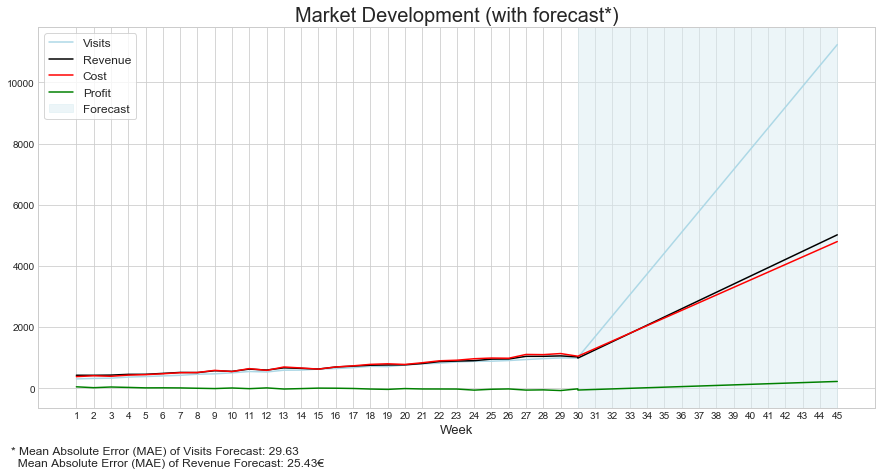

Mean values for forecasted weeks:


,Mean abs.,Mean WoW Growth (%)
Visits,6462,14.9%
Revenue,3134.33,10.5%
Cost,3044.92,9.9%
Profit,89.4085,65.4%


In [37]:
plot_mrkt_dev(df_overall, 'Market Development (with forecast*)', MAE_visits, MAE_revenue)
print('Mean values for forecasted weeks:')
show_mean(df_overall[df_overall.Week > 30])

- If we invest additional 250€ in "Aldebaran" campaign each week from Week 31 and freeze the Costs for other campaigns on Week 30 values, overall market will become profitable from Week 34 (with Profit 14.5€)
- Average weekly growth of Profit from Week 31 to Week 45 will be 65.4%

Other possible improvements:
- Adjust other campaigns
- Include LTV information for campaigns evaluation

# Appendix

In [38]:
# Save slides to presentation
prs.save('Presentation_Mrkt_Campaigns_raw.pptx')